In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

In [2]:
data_set=pd.read_csv('habermans/haberman.csv')

In [3]:
data_set.shape

(305, 4)

In [4]:
data_set.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [5]:
data_set.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
data_set['1.1'].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

In [7]:
data_set=data_set.rename(columns={"30": "age", "64": "year_from_1900","1": "axillary", "1.1": "Survival_status"})

In [8]:
data_set['Survival_status'].value_counts()

1    224
2     81
Name: Survival_status, dtype: int64

In [10]:
data_set.columns

Index(['age', 'year_from_1900', 'axillary', 'Survival_status'], dtype='object')

In [11]:
data_set.head()

,age,year_from_1900,axillary,Survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [16]:
data_set.describe()

,age,year_from_1900,axillary,Survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


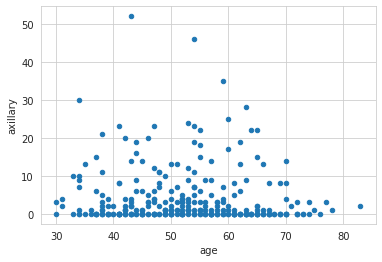

In [17]:
data_set.plot(kind='scatter',x='age',y='axillary');
plt.show()

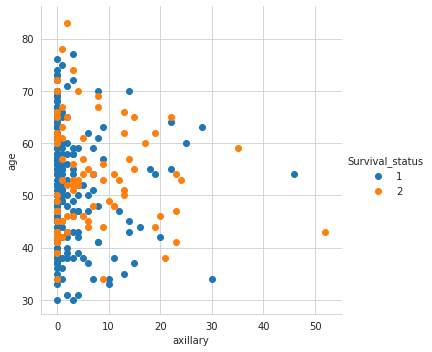

In [18]:
sns.set_style('whitegrid');
sns.FacetGrid(data_set,hue='Survival_status',size=5).map(plt.scatter,'axillary','age').add_legend();
plt.show()

/home/thair/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/thair/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


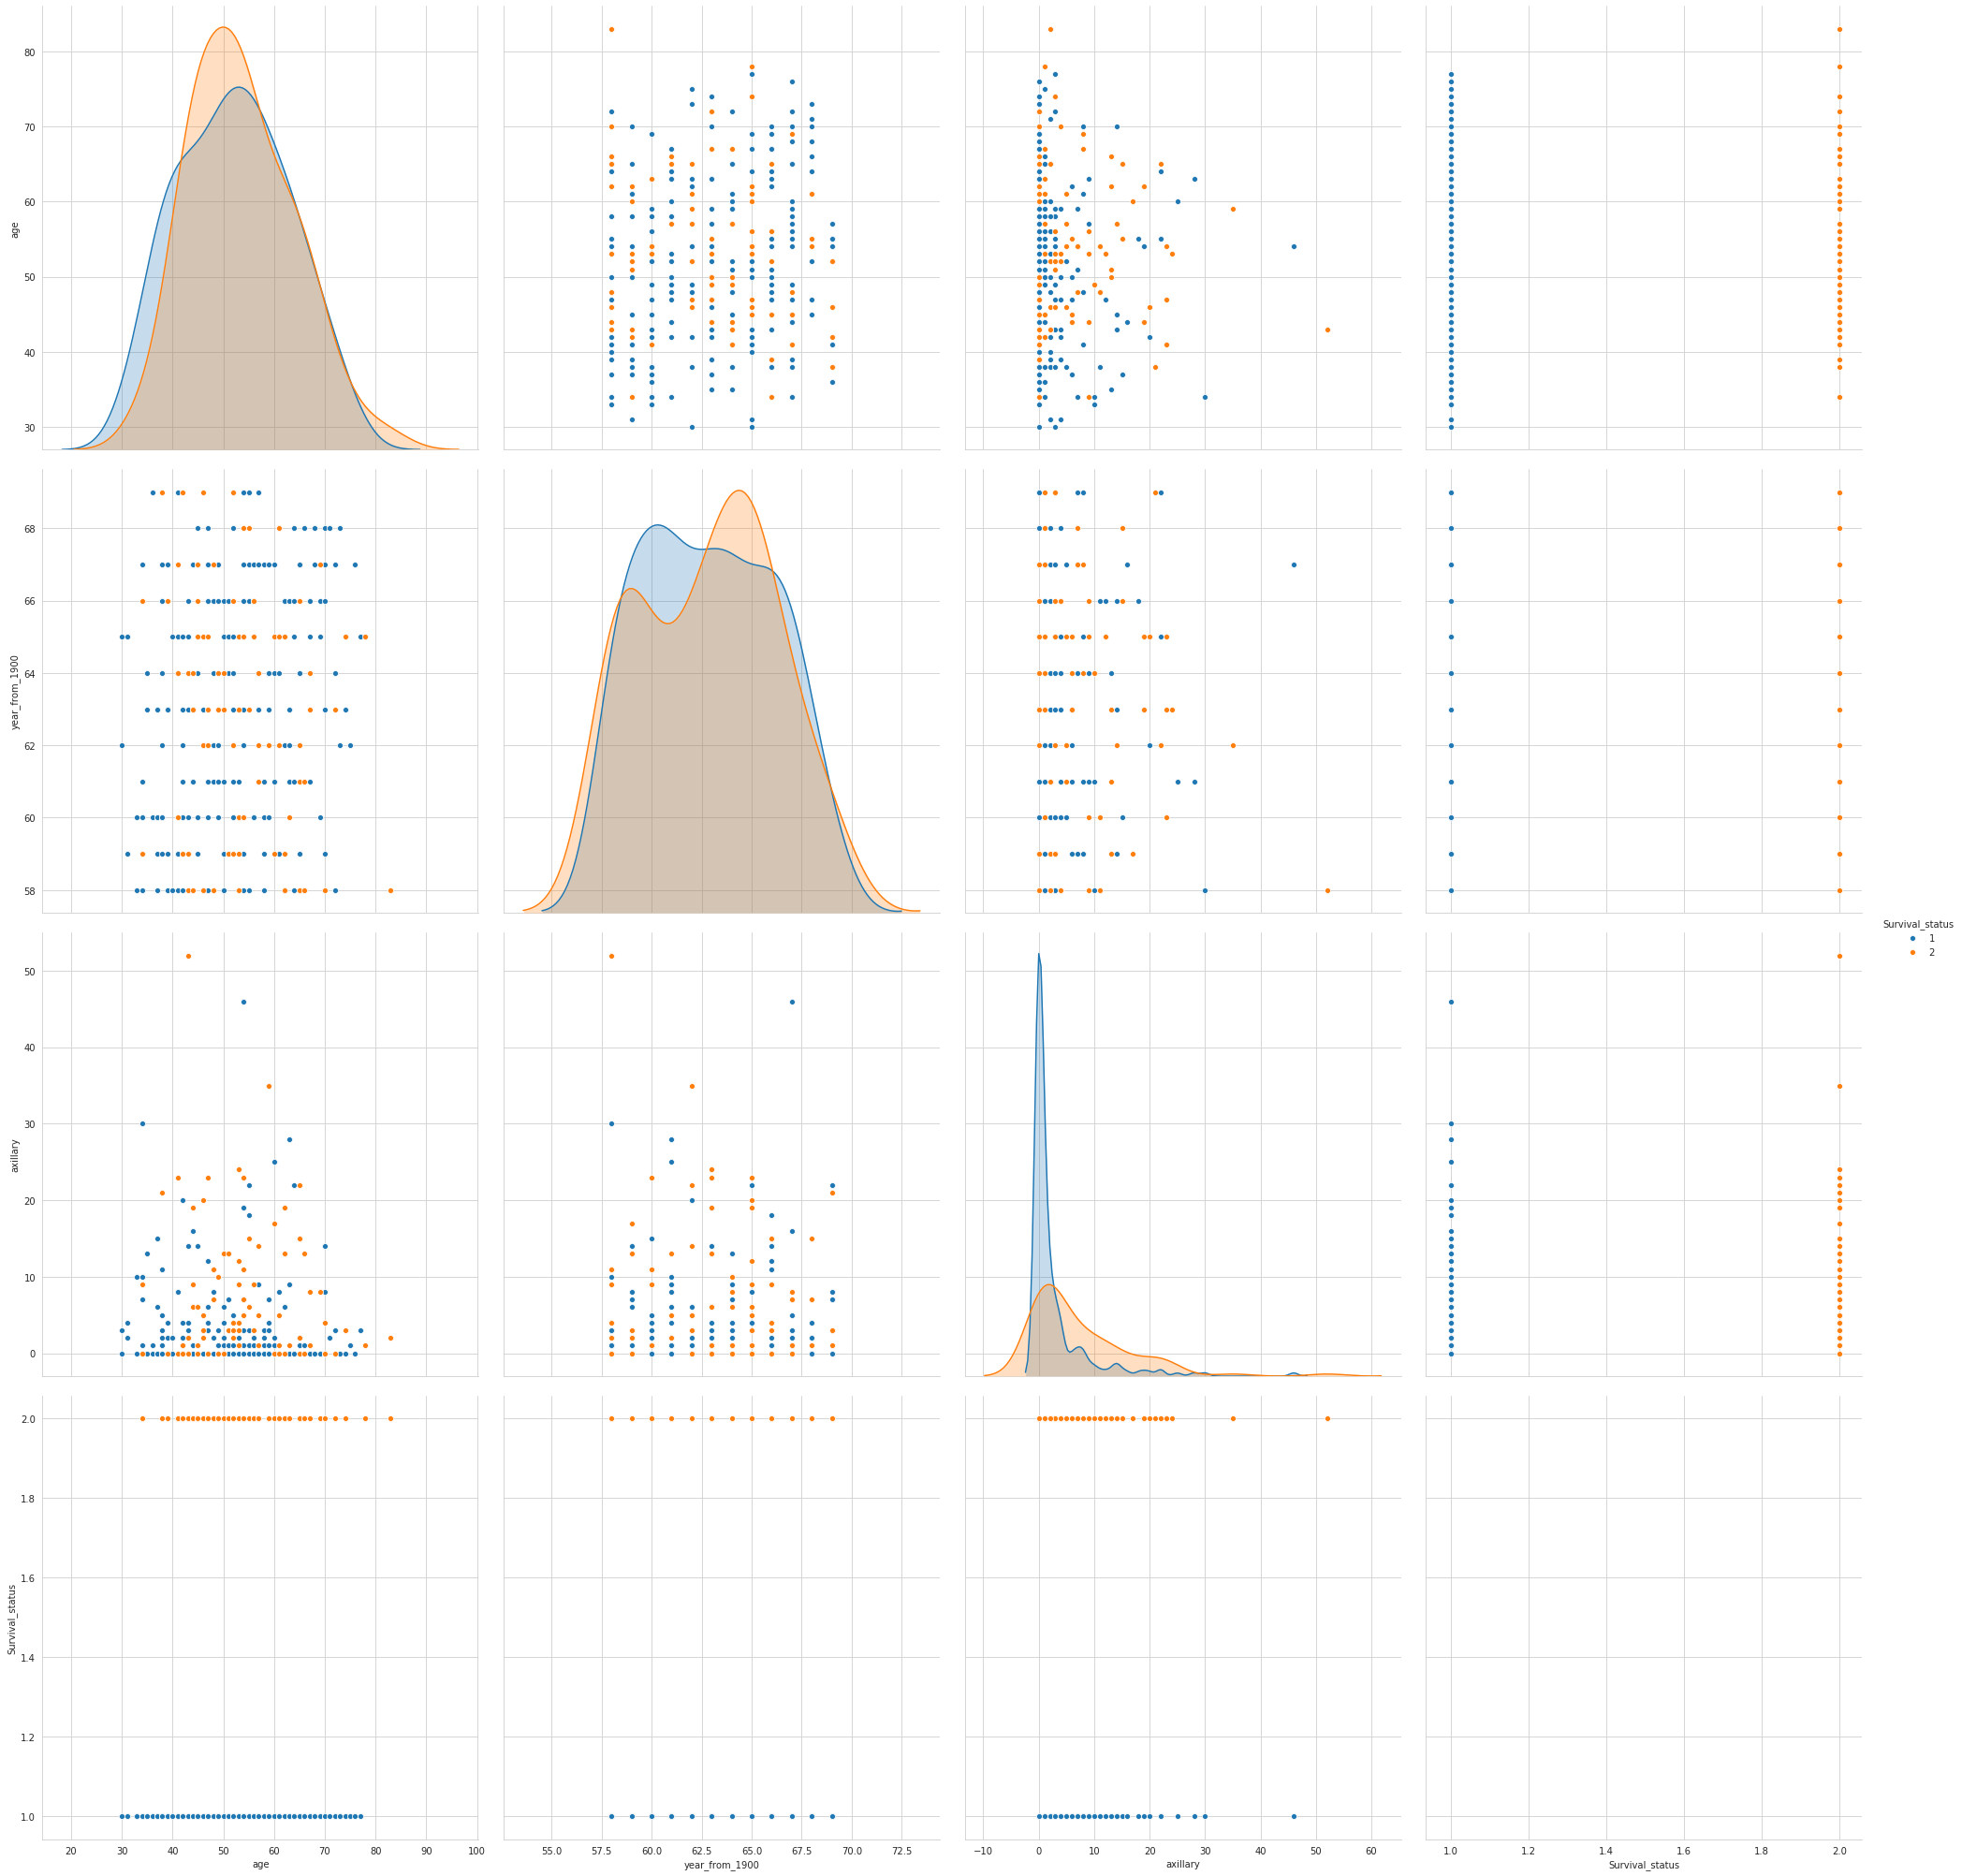

In [19]:
#pair-plot
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data_set,hue='Survival_status',height=7);
plt.show()

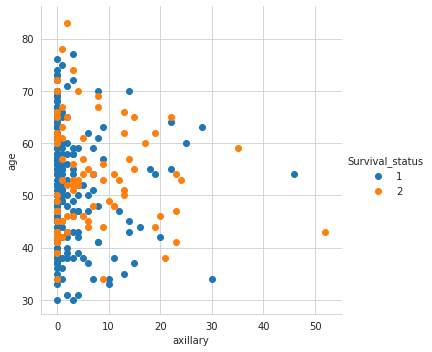

In [21]:
sns.set_style('whitegrid');
sns.FacetGrid(data_set,hue='Survival_status',size=5).map(plt.scatter,'axillary','age').add_legend();
plt.show()

In [22]:
more_than_5=data_set.loc[data_set['Survival_status']==1]
less_than_5=data_set.loc[data_set['Survival_status']==2]


In [25]:
less_than_5.shape

(81, 4)

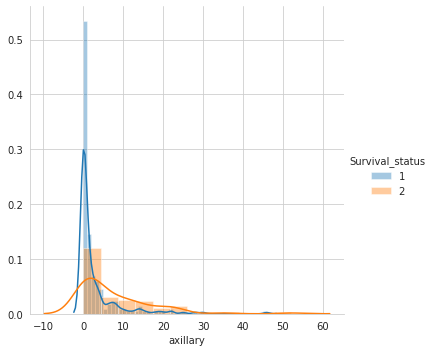

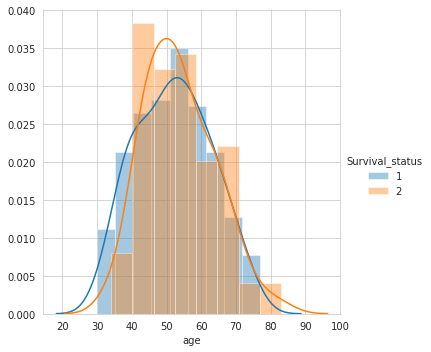

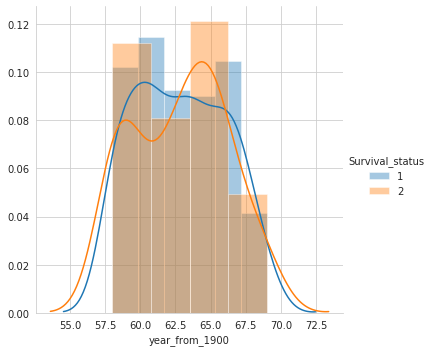

In [29]:
#distribution plot and density plot and univarent(only one feature consider at a time) analysis
#x-axis=petal length and y=axis=count the number of points in interval of x-axis
sns.FacetGrid(data_set,hue='Survival_status',size=5).map(sns.distplot,'axillary').add_legend();
sns.FacetGrid(data_set,hue='Survival_status',size=5).map(sns.distplot,'age').add_legend();
sns.FacetGrid(data_set,hue='Survival_status',size=5).map(sns.distplot,'year_from_1900').add_legend();
plt.show()

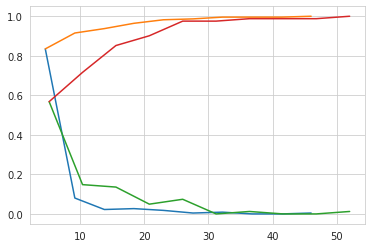

In [34]:
#plot CDF of petal_length
counts_more_than_5,bin_more_than_5=np.histogram(more_than_5['axillary'],bins=10,density=True)
counts_less_than_5,bin_less_than_5=np.histogram(less_than_5['axillary'],bins=10,density=True)
pdf_more_than_5=counts_more_than_5/(sum(counts_more_than_5))
pdf_less_than_5=counts_less_than_5/(sum(counts_less_than_5))

#compute CDF
cdf_more_than_5=np.cumsum(pdf_more_than_5)
cdf_less_than_5=np.cumsum(pdf_less_than_5)
plt.plot(bin_more_than_5[1:],pdf_more_than_5)
plt.plot(bin_more_than_5[1:],cdf_more_than_5)
plt.plot(bin_less_than_5[1:],pdf_less_than_5)
plt.plot(bin_less_than_5[1:],cdf_less_than_5)
plt.show()